# Performing Data Splitting

The [Japanese Manga Dataset](https://www.kaggle.com/datasets/chandlertimm/unified) is composed of over 3,000 grayscale-colorized paired manga panels, in the form of PNGs, from three different manga series or authors. Each manga series within this dataset have a distinct art-style. Within the `/dataset/unified` directory there are three other directories that store the grayscale-colorized paired manga panels for each respective manga series.

For our data splitting, we will generate randomized training and testing datasets regardless of the manga series. Essentially our goal is to organize the dataset into randomized image pairs,

```
dataset/
├──train_test
    ├── train_color/
    │   ├── image1.png
    │   ├── image2.png
    │   └── ...
    └── train_gray/
        ├── image1.png
        ├── image2.png
        └── ...
    └── test_color/
        ├── image1.png
        ├── image2.png
        └── ...
    └── test_gray/
        ├── image1.png
        ├── image2.png
        └── ...
├──unified
    └── ...
```

## Getting Started

In [14]:
import os
import random
import shutil
import matplotlib.pyplot as plt
from PIL import Image

DATASET_ROOT = 'dataset'
TRAIN_TEST_PATH = DATASET_ROOT + '/train_test'
UNIFIED_PATH = DATASET_ROOT + '/unified'
MANGA_SERIES = {'blackclover': UNIFIED_PATH + '/blackclover',
                'bukonohero': UNIFIED_PATH + '/bukonohero',
                'onepiece': UNIFIED_PATH + '/onepiece'}

In [2]:
# Create train and test directories
train_color = DATASET_ROOT + '/train_test/train_color'
train_gray = DATASET_ROOT + '/train_test/train_gray'
test_color = DATASET_ROOT + '/train_test/test_color'
test_gray = DATASET_ROOT + '/train_test/test_gray'

# Remove train-test set directory to re-shuffle
if os.path.exists(TRAIN_TEST_PATH):
    shutil.rmtree(TRAIN_TEST_PATH)

In [3]:
os.makedirs(train_color, exist_ok=True)
os.makedirs(train_gray, exist_ok=True)
os.makedirs(test_color, exist_ok=True)
os.makedirs(test_gray, exist_ok=True)

## Join and Randomize Manga Series

In [4]:
colored_panels = list()
gray_panels = list()

for series in MANGA_SERIES:
    manga_path = './' + MANGA_SERIES[series]
    colored = os.listdir(manga_path + '/colored')
    gray = os.listdir(manga_path + '/grayscale')
    
    colored_panels += [manga_path + '/colored/' + panel for panel in colored]
    gray_panels += [manga_path + '/grayscale/' + panel for panel in gray]

In [5]:
# Randomize
random.shuffle(colored_panels)
random.shuffle(gray_panels)

In [6]:
print(f'Number of colored panels: {len(colored_panels)}')
print(f'Number of grayscaled panels: {len(gray_panels)}')

Number of colored panels: 3577
Number of grayscaled panels: 4841


## Train-test Split

There are noticeably more gray manga panels in total. Therefore, we will opt to truncating our total train-test dataset size to the number of colored managa panels. The remaining gray manga panels we be our "holdout" set.

In [7]:
# Create 80:20 train and test set spit
trunc_size = len(colored_panels)
train_size = int(0.8 * trunc_size)

In [8]:
# Move files to train directory
for idx, panel in enumerate(colored_panels[:train_size]):
    new_file_name = str(idx) + '.png'
    shutil.copy(panel, train_color + '/' + new_file_name)
for idx, panel in enumerate(gray_panels[:train_size]):
    new_file_name = str(idx) + '.png'
    shutil.copy(panel, train_gray + '/' + new_file_name)

# Move remaining files to test directory
for idx, panel in enumerate(colored_panels[train_size:trunc_size]):
    new_file_name = str(idx) + '.png'
    shutil.copy(panel, test_color + '/' + new_file_name)
for idx, panel in enumerate(gray_panels[train_size:trunc_size]):
    new_file_name = str(idx) + '.png'
    shutil.copy(panel, test_gray + '/' + new_file_name)

In [13]:
# Holdout
os.makedirs(DATASET_ROOT + '/train_test/holdout', exist_ok=True)
for idx, panel in enumerate(gray_panels[trunc_size:]):
    new_file_name = str(idx) + '.png'
    shutil.copy(panel, DATASET_ROOT + '/train_test/holdout/' + new_file_name)

## PyTorch DataLoader

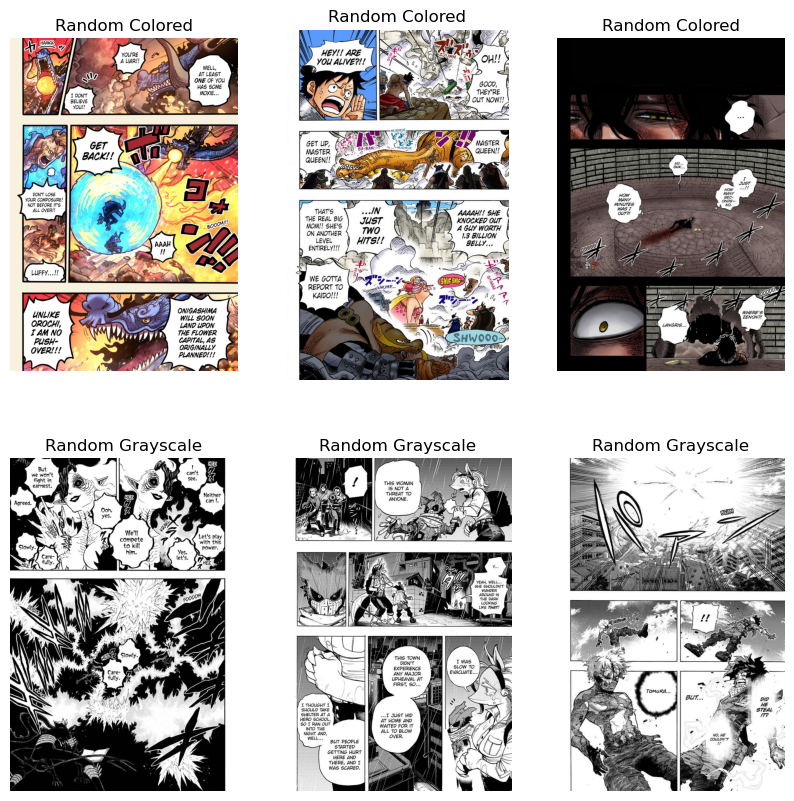

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

for idx in range(3):
    color = Image.open(colored_panels[idx])
    gray = Image.open(gray_panels[idx])
    
    axes[0][idx].axis('off')
    axes[0][idx].imshow(color)
    axes[0][idx].set_title("Random Colored")

    axes[1][idx].imshow(gray)
    axes[1][idx].axis('off')
    axes[1][idx].set_title("Random Grayscale")